In [1]:
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

In [2]:
tick = pd.read_csv("test_tick_happy_path.csv")
tick["date-time"] = pd.to_datetime(tick["date-time"])
tick.set_index("date-time", inplace=True)

## Plot Tick

<Axes: xlabel='date-time'>

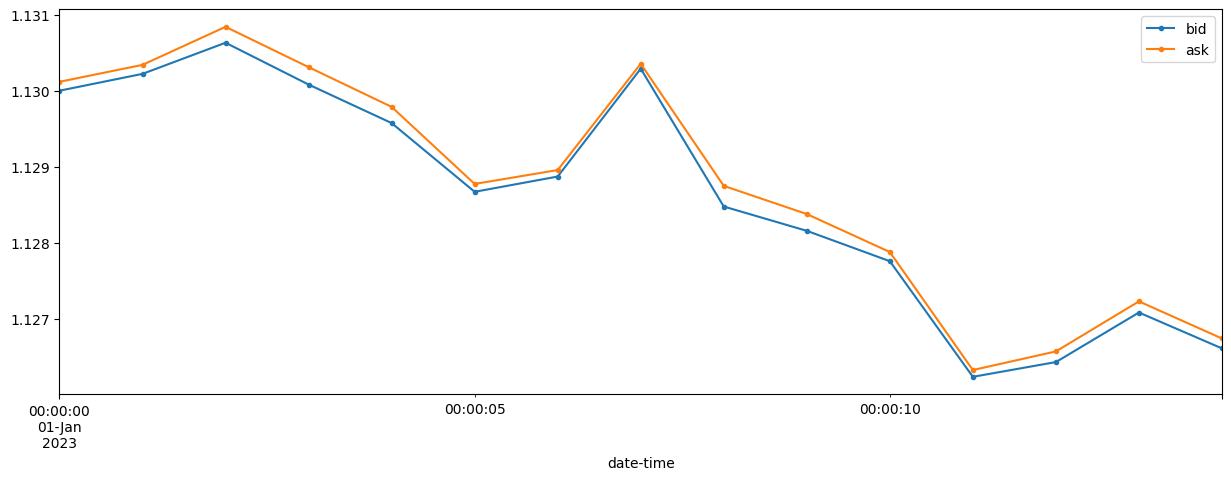

In [3]:
tick[["bid","ask"]][0:15].plot(marker=".", figsize=(15,5))

## Plot Spread Distribution

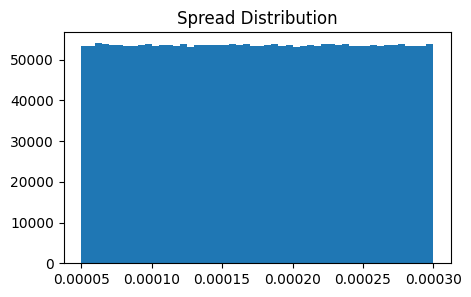

In [4]:
fig, ax = plt.subplots(1, figsize=(5,3))
tick["spread"].hist(bins=50, ax = ax)
ax.grid(False)
ax.set_title("Spread Distribution")
plt.show()

## Plot Return Deistribution

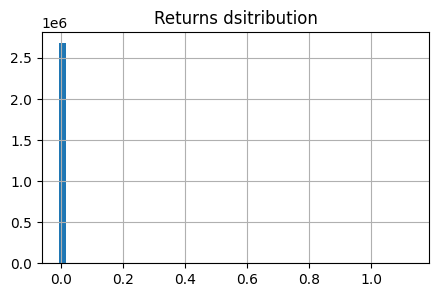

In [5]:
fig, ax = plt.subplots(1, figsize=(5,3))
ax.grid(False)
tick["delta_p"].hist(bins=50, ax=ax)
ax.set_title("Returns dsitribution")
plt.show()

In [6]:
tick.describe()

,delta_p,bid,spread,ask
count,2.678401e+06,2.678401e+06,2.678401e+06,2.678401e+06
mean,1.582004e-06,2.819381e+00,1.749760e-04,2.819556e+00
std,1.214440e-03,1.013069e+00,7.217193e-05,1.013069e+00
min,-5.348265e-03,6.863359e-01,5.000004e-05,6.864205e-01
25%,-6.724677e-04,2.041723e+00,1.124853e-04,2.041906e+00
50%,1.812111e-06,2.699422e+00,1.749123e-04,2.699596e+00
75%,6.744833e-04,3.802280e+00,2.374386e-04,3.802469e+00
max,1.130000e+00,4.618514e+00,2.999999e-04,4.618683e+00


In [7]:
tick.tail()

,delta_p,bid,spread,ask
date-time,,,,
2023-01-31 23:59:56,-0.001016,4.236688,0.000299,4.236987
2023-01-31 23:59:57,0.000451,4.237139,0.000218,4.237357
2023-01-31 23:59:58,0.000986,4.238124,0.000058,4.238182
2023-01-31 23:59:59,-0.001433,4.236691,0.000225,4.236916
2023-02-01 00:00:00,0.000551,4.237242,0.000222,4.237464


In [8]:
ohlc = tick["bid"].resample("1h").ohlc()

## Plot OHLC

In [9]:
ohlc = pd.read_csv("ohlc_bid_1h.csv")
ohlc["date-time"] = pd.to_datetime(ohlc["date-time"])
ohlc.set_index("date-time", inplace=True)

In [10]:
ohlc.head()

,open,high,low,close
date-time,,,,
2023-01-01 00:00:00,1.300000,1.380738,1.293875,1.362914
2023-01-01 01:00:00,1.361349,1.542670,1.359936,1.512708
2023-01-01 02:00:00,1.514877,1.549290,1.485204,1.517530
2023-01-01 03:00:00,1.516627,1.571904,1.472978,1.568208
2023-01-01 04:00:00,1.567846,1.645099,1.537154,1.630507


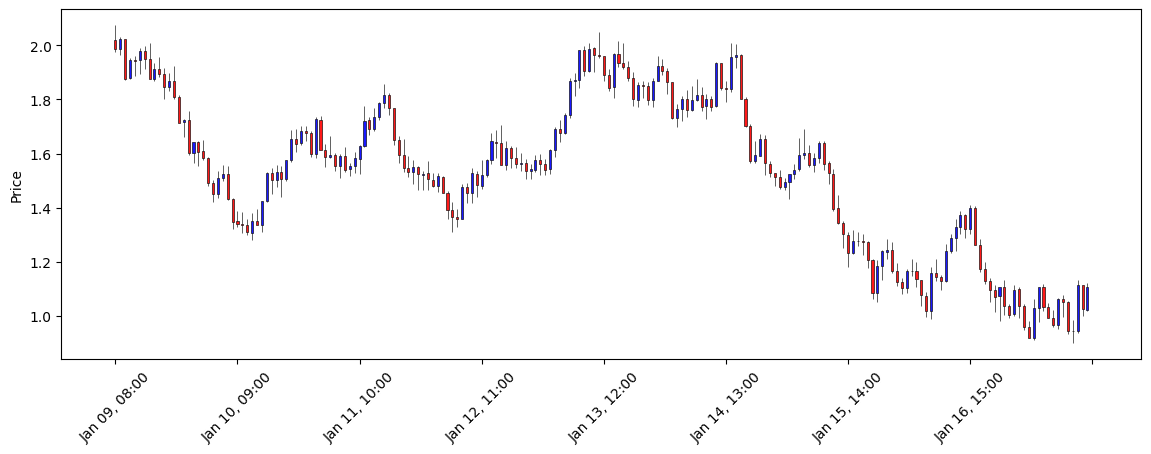

In [13]:
mc2 = mpf.make_marketcolors(up='blue',down='r')
s2  = mpf.make_mpf_style(marketcolors=mc2)
mpf.plot(ohlc[200:400], type="candle", figsize=(15,5), style=s2)

In [12]:
help(mpf.plot)

Help on function plot in module mplfinance.plotting:

plot(data, **kwargs)
    Given a Pandas DataFrame containing columns Open,High,Low,Close and optionally Volume
    with a DatetimeIndex, plot the data.
    Available plots include ohlc bars, candlestick, and line plots.
    Also provide visually analysis in the form of common technical studies, such as:
    moving averages, renko, etc.
    Also provide ability to plot trading signals, and/or addtional user-defined data.

